## CNN Training
From. neural-network-digital-counter-readout-master\Train_CNN_Digital-Readout-Small-v3.ipynb

### 1. Preparing the training

In [1]:
########### Basic Parameters for Running: ################################

TFliteName = "digit_v3"   # Used for tflite Filename
Epoch = 500

##########################################################################

import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from sklearn.utils import shuffle
from tensorflow.python import keras
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical
from PIL import Image
from pathlib import Path

In [15]:
loss_ges = np.array([])
acc_ges = np.array([])

%matplotlib inline
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

### 2. Load training data

In [3]:
Input_dir='image_resized'

files = glob.glob(Input_dir + '/*.jpg')
x_data = []
y_data = []

In [4]:
for file in files:
    base = os.path.basename(file)
    target = base[0:1]
    if target == "N":       # 첫 글자가 N 인 경우
        category = 10       # NaN -> 10 으로 변경
    else:
        category = int(target)

    test_image = Image.open(file)
    test_image = np.array(test_image, dtype="float32")
    x_data.append(test_image)
    y_data.append(np.array([category]))

print(f'Image Size: {len(x_data[0])}')
print(f'Total X: {len(x_data)}, Y: {len(y_data)}')

Image Size: 32
Total X: 1468, Y: 1468


In [5]:
x_data = np.array(x_data)
y_data = np.array(y_data)
y_data = to_categorical(y_data, 11)

print(f'Shape of Input Layer: {x_data.shape}')
print(f'# of Layer: {y_data.shape}')

Shape of Input Layer: (1468, 32, 20, 3)
# of Layer: (1468, 11)


In [7]:
x_data, y_data = shuffle(x_data, y_data)

# 해당 예제에선 모든 이미지를 Train Set 으로 사용
X_train = x_data
y_train = y_data

### 3. Make CNN Model

In [8]:
inputs = tf.keras.Input(shape=(32, 20, 3))
inputs2 = tf.keras.layers.BatchNormalization()(inputs)
inputs3 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu")(inputs2)
inputs4 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(inputs3)
inputs5 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu")(inputs4)
inputs6 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(inputs5)
inputs7 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu")(inputs6)
inputs8 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(inputs7)
inputs9 = tf.keras.layers.Flatten()(inputs8)
inputs10 = tf.keras.layers.Dense(128,activation="relu")(inputs9)
output = tf.keras.layers.Dense(11, activation='softmax')(inputs10)

In [9]:
model = tf.keras.Model(inputs=inputs, outputs=output)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95),
              metrics = ["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 20, 3)]       0         
                                                                 
 batch_normalization (BatchN  (None, 32, 20, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 32, 20, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 5, 32)         0     

### 4. Training

In [10]:
# ImageDataGenerator 를 통해 테스트 데이터셋 확장
Batch_Size = 4
Shift_Range = 1
Brightness_Range = 0.3
Rotation_Angle = 10
ZoomRange = 0.4

datagen = ImageDataGenerator(width_shift_range=[-Shift_Range,Shift_Range],
                             height_shift_range=[-Shift_Range,Shift_Range],
                             brightness_range=[1-Brightness_Range,1+Brightness_Range],
                             zoom_range=[1-ZoomRange, 1+ZoomRange],
                             rotation_range=Rotation_Angle)

In [11]:
train_iterator = datagen.flow(x_data, y_data, batch_size=Batch_Size)
history = model.fit(train_iterator, epochs = Epoch)

Epoch 1/500
367/367 [==============================] - 8s 4ms/step - loss: 2.1085 - accuracy: 0.3447
Epoch 2/500
367/367 [==============================] - 1s 3ms/step - loss: 1.5575 - accuracy: 0.4959
Epoch 3/500
367/367 [==============================] - 1s 3ms/step - loss: 1.0730 - accuracy: 0.6519
Epoch 4/500
367/367 [==============================] - 1s 3ms/step - loss: 0.8742 - accuracy: 0.7214
Epoch 5/500
367/367 [==============================] - 1s 3ms/step - loss: 0.7387 - accuracy: 0.7677
Epoch 6/500
367/367 [==============================] - 1s 3ms/step - loss: 0.6576 - accuracy: 0.7977
Epoch 7/500
367/367 [==============================] - 1s 3ms/step - loss: 0.6218 - accuracy: 0.8059
Epoch 8/500
367/367 [==============================] - 1s 3ms/step - loss: 0.4965 - accuracy: 0.8379
Epoch 9/500
367/367 [==============================] - 1s 3ms/step - loss: 0.4800 - accuracy: 0.8515
Epoch 10/500
367/367 [==============================] - 1s 3ms/step - loss: 0.4580 - accura

### 5. Result (Plot)

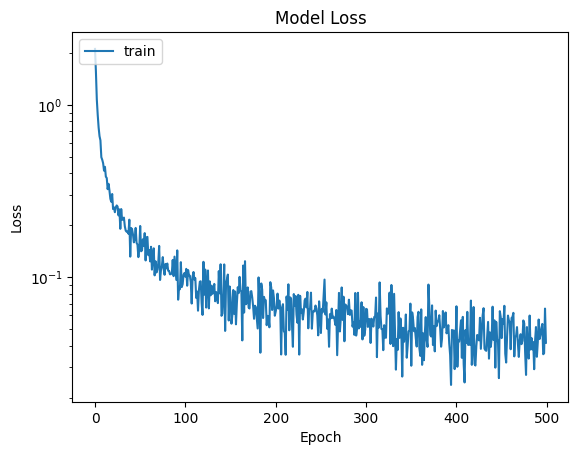

In [16]:
loss_ges = np.append(loss_ges, history.history['loss'])
plt.semilogy(history.history['loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','eval'], loc='upper left')
plt.show()

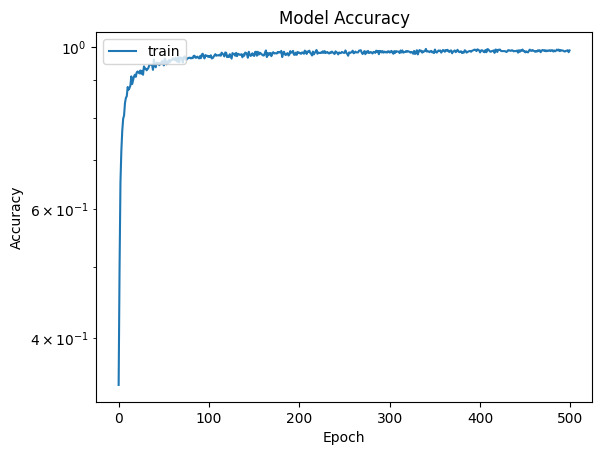

In [17]:
acc_ges = np.append(loss_ges, history.history['accuracy'])
plt.semilogy(history.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','eval'], loc='upper left')
plt.show()

### 6. Save the model

In [18]:
FileName = TFliteName

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(FileName + ".tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\PC\AppData\Local\Temp\tmpd37neoe1\assets


218940

In [19]:
FileName = TFliteName + "q.tflite"

import tensorflow as tf

def representative_dataset():
    for n in range(x_data[0].size):
        data = np.expand_dims(x_data[5], axis=0)
        yield [data.astype(np.float32)]

converter2 = tf.lite.TFLiteConverter.from_keras_model(model)
converter2.representative_dataset = representative_dataset
converter2.optimizations = [tf.lite.Optimize.DEFAULT]
converter2.representative_dataset = representative_dataset
tflite_quant_model = converter2.convert()

open(FileName, "wb").write(tflite_quant_model)
print(FileName)
Path(FileName).stat().st_size

INFO:tensorflow:Assets written to: C:\Users\PC\AppData\Local\Temp\tmp3fs1g9qt\assets


INFO:tensorflow:Assets written to: C:\Users\PC\AppData\Local\Temp\tmp3fs1g9qt\assets


digit_v3q.tflite


61960

### 7. Check accuracy with each Image

ziffer_sortiert_resize\1_D5_2020-08-16_02-14-25.jpg 1 -1


ziffer_sortiert_resize\2_waerme_3_20221103-070050.jpg 2 1


ziffer_sortiert_resize\3_main_dig5.jpg 3 8


ziffer_sortiert_resize\5_02.jpg 5 6


ziffer_sortiert_resize\NaN_4_dig6_20210725-165201.jpg -1 4


ziffer_sortiert_resize\NaN_4_dig6_20210726-040341.jpg -1 8


ziffer_sortiert_resize\NaN_4_dig6_20210727-213247.jpg -1 4


ziffer_sortiert_resize\NaN_6_dig6_20210723-181616.jpg -1 6


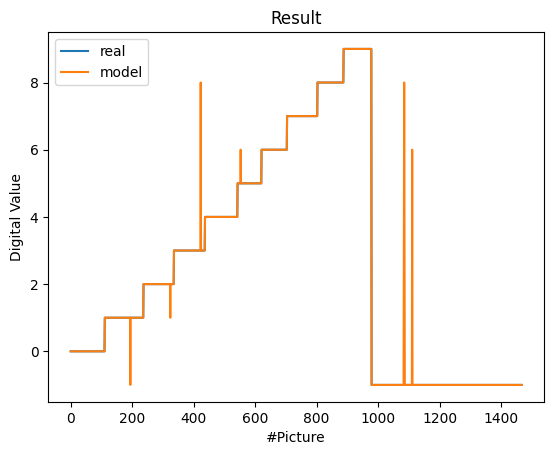

In [20]:
Input_dir='image_resized'
res = []
only_deviation = True
show_wrong_image = True

files = glob.glob(Input_dir + '/*.jpg')

for aktfile in files:
    base = os.path.basename(aktfile)
    target = base[0:1]

    if target == "N":
        zw1 = -1
    else:
        zw1 = int(target)
    expected_class = zw1

    image_in = Image.open(aktfile)

    test_image = np.array(image_in, dtype="float32")
    img = np.reshape(test_image,[1,32,20,3])
    classes = np.argmax(model.predict(img), axis=-1)
    classes = classes[0]

    if classes == 10:
        classes = -1

    zw2 = classes
    zw3 = zw2 - zw1
    res.append(np.array([zw1, zw2, zw3]))

    if only_deviation == True:
        if str(classes) != str(expected_class):
            print(aktfile + " " + str(expected_class) +  " " + str(classes))
            if show_wrong_image == True:
                display(image_in)
    else:
        print(aktfile + " " + aktsubdir +  " " + str(classes))


res = np.asarray(res)


plt.plot(res[:,0])
plt.plot(res[:,1])
plt.title('Result')
plt.ylabel('Digital Value')
plt.xlabel('#Picture')
plt.legend(['real','model'], loc='upper left')
plt.show()